# 0x01. Classification
<hr>

Importing libraries:

In [926]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
#from sklearn.metrics import jaccard_similarity_score, mean_squared_error, classification_report
#from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
import pandas as pd
%matplotlib inline

console commands for the .py files:

In [218]:
#!cp 5-neuron.py 6-neuron.py

In [1060]:
!chmod +x *.py

In [1074]:
!pycodestyle 6-neuron.py

0. Class Neuron
<hr>
Define a single neuron performing binary classification

In [1080]:
class Neuron():
    """ Class Neuron """

    def __init__(self, nx):
        """ Constractor """
        
        # nx: number of input features to the neuron
        if type(nx) is not int:
            raise TypeError("nx must be an integer")
        if nx < 1:
            raise ValueError("nx must be a positive integer")
        self.nx = nx
        # weights vector for the neuron
        self.__W = np.random.randn(1, self.nx)
        # bias for the neuron
        self.__b = 0
        # activated output of the neuron (prediction)
        self.__A = 0

    @property
    def W(self):
        """ weights getter """
        return self.__W

    @property
    def b(self):
        """ bias getter """
        return self.__b

    @property
    def A(self):
        """ active output getter """
        return self.__A

    def forward_prop(self, X):
        """
            Calculate the forward 
            propagation of the neuron
            using sigmoid activation function
        """

        x = np.matmul(self.__W, X) + self.b
        self.__A = (1/(1+np.exp(-x))) #sigmoid
        return self.__A

    def cost(self, Y, A):
        """ Calculate the cost of the model using logistic regression """
        
        m = Y.shape[1]
        s = np.sum(Y * np.log(A) + (1 - Y) * np.log(1.0000001 - A)) 
        return -(1 / m) * s

    def evaluate(self, X, Y):
        """ Evaluate the neuron’s predictions """
        self.__A = self.forward_prop(X)
        cost = self.cost(Y, self.__A)
        self.__A = np.where(self.__A >= 0.5, 1, 0)
        return (self.__A, cost)
    
    def sigmoid_der(self, x):
        return x * (1 - x)
    
    def gradient_descent(self, X, Y, A, alpha=0.05):
        """ Calculate one pass of gradient descent on the neuron """
        # The Mean Error
        ME = np.mean((self.__A - Y))
        # update bias
        self.__b += ME * -alpha
        # update weights
        m = X.shape[1]
        x = A - Y
        xlr = -alpha/m * X.T
        self.__W = np.add(self.__W, np.matmul(x, xlr))
    
    def train(self, X, Y, iterations=5000, alpha=0.05):
        """ train the neuron """
        # check iterations validity
        if type(iterations) is not int:
            raise TypeError('iterations must be an integer')
        if iterations < 0:
            raise ValueError('iterations must be a positive integer')
        # check alpha validity
        if type(alpha) is not float:
            raise TypeError('alpha must be a float')
        if alpha < 0:
             raise ValueError('alpha must be positive')
        # train the model
        for i in range(iterations):
            self.__A = self.forward_prop(X)
            self.gradient_descent(X, Y, self.__A, alpha)
        self.__A, cost = self.evaluate(X, Y)
        return (self.__A, cost)

In [1081]:
#main 0
lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
print(neuron.W)
print(neuron.W.shape)
print(neuron.b)
print(neuron.A)
neuron.A = 10
print(neuron.A)

[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
   0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
   0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
   2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
   0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
   1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
  -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
  -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
  -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
  -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
  -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
   1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
  -0.31155253  0.05616534 -1.16514984 

AttributeError: can't set attribute

In [1082]:

lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
print(neuron.W)
print(neuron.b)
print(neuron.A)
neuron.A = 10
print(neuron.A)


[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
   0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
   0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
   2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
   0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
   1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
  -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
  -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
  -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
  -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
  -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
   1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
  -0.31155253  0.05616534 -1.16514984 

AttributeError: can't set attribute

In [1083]:
lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
neuron._Neuron__b = 1
A = neuron.forward_prop(X)
if (A is neuron.A):
    print(A)


[[0.         0.00072463 0.00000045 ... 0.00008757 0.00000113 0.65579993]]


In [1084]:
lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
A = neuron.forward_prop(X)
cost = neuron.cost(Y, A)
print(cost)

4.365104944262272


In [800]:
lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
A, cost = neuron.evaluate(X, Y)
print(A, A.shape)
print(cost)

[[0 0 0 ... 0 0 0]] (1, 12665)
4.365104944262272


In [1085]:
lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X.shape[0])
A = neuron.forward_prop(X)
neuron.gradient_descent(X, Y, A, 0.5)
print(neuron.b)
print(neuron.W)

0.2579495783615682
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
   0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
   0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
   2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
   0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
   1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
  -1.70625817  1.95079081 -0.5096499  -0.4380743  -1.25279536  0.77749036
  -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
  -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
  -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
  -1.63018517  0.46280831 -0.90725077  0.05212487  0.72936918  0.12933298
   1.13961474 -1.23475337  0.4023694  -0.68477107 -0.8707879  -0.57884966
  -0.31155253  0.05

In [1086]:
m = X.shape[1]
n = X.shape[0]
alpha = 0.5
neuron._Neuron5__b = 0
b = 0
np.random.seed(0)
w = np.random.randn(1, X.shape[0]) #neuron._Neuron5__W
A = neuron.forward_prop(X)
def sigmoid_der(x):
    return x * (1 - x)
cost = neuron.cost(Y, A)
in_o = np.matmul(weights, X) + b
b = 0
print(b)
i = 0
#A, cost = neuron.evaluate(X, Y)
# The mean error
ME = np.mean((A - Y))
# variance
var = np.var(A)
b = abs(ME) * alpha
MSE = np.square(np.subtract(A, Y)).mean() 
#np.set_printoptions(suppress=True)
k = (np.dot(X.T, ME)) * alpha
x = A - Y
xlr = -alpha/m * X.T
w = np.add(w, np.matmul(x, xlr))
#w

0


In [1087]:
lib_train = np.load('Binary_Train.npz')
X_train_3D, Y_train = lib_train['X'], lib_train['Y']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1)).T
lib_dev = np.load('Binary_Dev.npz')
X_dev_3D, Y_dev = lib_dev['X'], lib_dev['Y']
X_dev = X_dev_3D.reshape((X_dev_3D.shape[0], -1)).T
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_dev.shape,  Y_dev.shape)

Train set: (784, 12665) (1072,)
Test set: (784, 2115) (1, 2115)


In [1088]:
np.random.seed(0)
neuron = Neuron(X_train.shape[0])
A, cost = neuron.evaluate(X_dev, Y_dev)
print(A.shape, X.shape, Y.shape, neuron._Neuron__W.shape, cost)
A, cost = neuron.train(X_train, Y_train, iterations=20)
#print(classification_report(Y_train, A))

(1, 2115) (784, 12665) (1, 12665) (1, 784) 4.4667426589977035


Train cost: 0.029306120522095205
Train accuracy: 99.16304776944335%
Dev cost: 0.025628775802453183
Dev accuracy: 99.2434988179669%


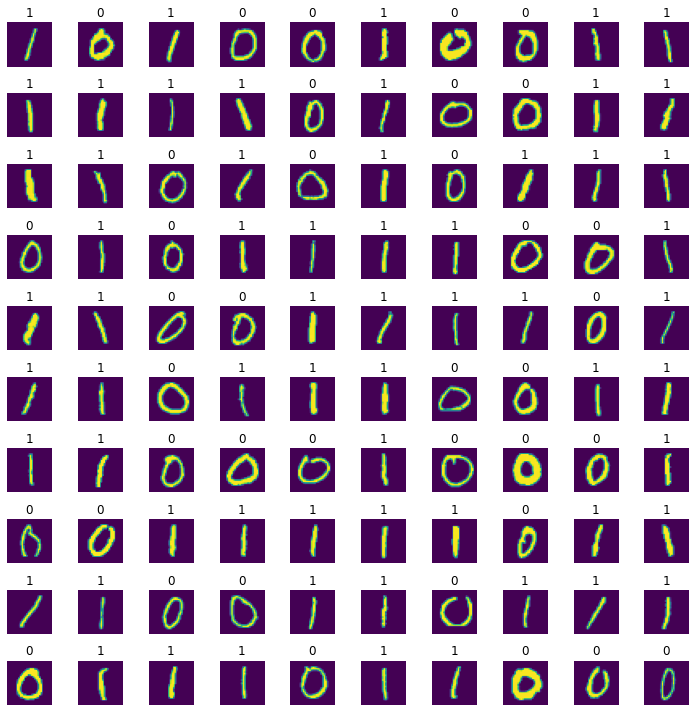

In [1089]:
np.random.seed(0)
neuron = Neuron(X_train.shape[0])
#A, cost = neuron.evaluate(X_dev, Y_dev)
A, cost = neuron.train(X_train, Y_train, iterations=700)
accuracy = np.sum(A == Y_train) / Y_train.shape[1] * 100
print("Train cost:", cost)
print("Train accuracy: {}%".format(accuracy))
A, cost = neuron.evaluate(X_dev, Y_dev)
accuracy = np.sum(A == Y_dev) / Y_dev.shape[1] * 100
print("Dev cost:", cost)
print("Dev accuracy: {}%".format(accuracy))
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_dev_3D[i])
    plt.title(A[0, i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Train cost: 2.2109041655100437
Train accuracy: 64.18476115278327%
Dev cost: 2.175111223982319
Dev accuracy: 65.91016548463357%

Train cost: 1.545957101482635
Train accuracy: 61.61073825503356%
Dev cost: 1.542761043856265
Dev accuracy: 61.938534278959814%

Train cost: 1.6475684822054086
Train accuracy: 62.581918673509676%
Dev cost: 1.6389356277718645
Dev accuracy: 63.07328605200946%